#Importing Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from keras.models import Sequential
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adamax
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
x_train = pd.read_csv("ALL_X_train_p.csv")
y_train = pd.read_csv("ALL_y_train_p.csv")
x_test = pd.read_csv("ALL_X_test_p.csv")
y_test = pd.read_csv("ALL_y_test_p.csv")


#EXPLORING

In [ ]:
x_train

,Unnamed: 0,r1t1,r1t2,r1t3,r1t4,r2t1,r2t2,r2t3,r2t4
0,0,0.857143,0.785714,0.916667,0.846154,0.900000,0.875000,0.666667,0.583333
1,1,0.555556,0.928571,0.250000,0.857143,0.928571,0.444444,0.900000,0.571429
2,2,0.857143,0.428571,0.583333,0.692308,0.500000,0.875000,0.666667,0.833333
3,3,0.714286,0.857143,0.333333,0.846154,0.500000,0.750000,0.888889,0.666667
4,4,0.642857,0.714286,0.833333,0.846154,0.800000,0.750000,0.444444,0.500000
...,...,...,...,...,...,...,...,...,...
13948,13948,0.500000,0.785714,0.750000,0.923077,0.800000,0.875000,0.555556,0.583333
13949,13949,0.571429,0.785714,0.750000,0.846154,0.700000,0.875000,0.555556,0.666667
13950,13950,0.285714,0.785714,0.400000,0.933333,0.533333,0.625000,0.625000,0.500000
13951,13951,0.888889,0.428571,0.750000,0.571429,0.714286,1.000000,0.600000,0.857143


In [ ]:
x_train.describe()

,Unnamed: 0,r1t1,r1t2,r1t3,r1t4,r2t1,r2t2,r2t3,r2t4
count,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000
mean,6976.000000,0.732111,0.736229,0.661648,0.704418,0.636129,0.736301,0.687203,0.644405
std,4028.028488,0.149544,0.173437,0.197857,0.188444,0.225658,0.162209,0.147712,0.239129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3488.000000,0.642857,0.642857,0.533333,0.571429,0.500000,0.625000,0.625000,0.500000
50%,6976.000000,0.714286,0.785714,0.666667,0.733333,0.700000,0.750000,0.666667,0.666667
75%,10464.000000,0.857143,0.857143,0.812500,0.866667,0.800000,0.875000,0.800000,0.833333
max,13952.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13953 non-null  int64  
 1   r1t1        13953 non-null  float64
 2   r1t2        13953 non-null  float64
 3   r1t3        13953 non-null  float64
 4   r1t4        13953 non-null  float64
 5   r2t1        13953 non-null  float64
 6   r2t2        13953 non-null  float64
 7   r2t3        13953 non-null  float64
 8   r2t4        13953 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 981.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  13953 non-null  int64
 1   N_People    13953 non-null  int64
dtypes: int64(2)
memory usage: 218.1 KB


In [ ]:
x_train.shape

(13953, 9)

In [ ]:
print(x_train.isnull().sum())

Unnamed: 0    0
r1t1          0
r1t2          0
r1t3          0
r1t4          0
r2t1          0
r2t2          0
r2t3          0
r2t4          0
dtype: int64


In [ ]:
y_train.head(5)

,Unnamed: 0,N_People
0,0,7
1,1,0
2,2,0
3,3,9
4,4,7


In [ ]:
print(y_train.isnull().sum())

Unnamed: 0    0
N_People      0
dtype: int64


In [ ]:
x_test.head(5)

,Unnamed: 0,r1t1,r1t2,r1t3,r1t4,r2t1,r2t2,r2t3,r2t4
0,0,0.642857,0.714286,0.733333,0.866667,0.466667,0.625000,0.875000,0.500000
1,1,0.714286,0.923077,0.812500,0.625000,0.857143,0.916667,0.600000,0.600000
2,2,0.571429,0.714286,0.916667,0.923077,0.800000,0.875000,0.666667,0.666667
3,3,0.857143,0.500000,0.666667,0.692308,0.500000,0.875000,0.666667,0.833333
4,4,0.785714,0.538462,0.812500,0.625000,0.857143,0.750000,0.400000,0.600000


In [ ]:
print(x_test.isnull().sum())

Unnamed: 0    0
r1t1          0
r1t2          0
r1t3          0
r1t4          0
r2t1          0
r2t2          0
r2t3          0
r2t4          0
dtype: int64


In [ ]:
y_test.head(5)

,Unnamed: 0,N_People
0,0,5
1,1,8
2,2,7
3,3,0
4,4,2


In [ ]:
print(y_test.isnull().sum())

Unnamed: 0    0
N_People      0
dtype: int64


In [ ]:
x_train.columns[:].duplicated()

array([False, False, False, False, False, False, False, False, False])

In [ ]:
y_train.columns[:].duplicated()

array([False, False])

In [ ]:
x_test.columns[:].duplicated()

array([False, False, False, False, False, False, False, False, False])

In [ ]:
x_test.columns[:].duplicated()

array([False, False, False, False, False, False, False, False, False])

In [ ]:
x_train = x_train.drop(['Unnamed: 0'], axis=1)

In [ ]:
x_train.head(5)

,r1t1,r1t2,r1t3,r1t4,r2t1,r2t2,r2t3,r2t4
0,0.857143,0.785714,0.916667,0.846154,0.900000,0.875000,0.666667,0.583333
1,0.555556,0.928571,0.250000,0.857143,0.928571,0.444444,0.900000,0.571429
2,0.857143,0.428571,0.583333,0.692308,0.500000,0.875000,0.666667,0.833333
3,0.714286,0.857143,0.333333,0.846154,0.500000,0.750000,0.888889,0.666667
4,0.642857,0.714286,0.833333,0.846154,0.800000,0.750000,0.444444,0.500000


In [ ]:
x_train.head(5)

,r1t1,r1t2,r1t3,r1t4,r2t1,r2t2,r2t3,r2t4
0,0.857143,0.785714,0.916667,0.846154,0.900000,0.875000,0.666667,0.583333
1,0.555556,0.928571,0.250000,0.857143,0.928571,0.444444,0.900000,0.571429
2,0.857143,0.428571,0.583333,0.692308,0.500000,0.875000,0.666667,0.833333
3,0.714286,0.857143,0.333333,0.846154,0.500000,0.750000,0.888889,0.666667
4,0.642857,0.714286,0.833333,0.846154,0.800000,0.750000,0.444444,0.500000


In [ ]:
x_train.shape

(13953, 8)

In [ ]:
y_train = y_train.drop(['Unnamed: 0'], axis = 1)

In [ ]:
y_train.head(5)

,N_People
0,7
1,0
2,0
3,9
4,7


In [ ]:
y_train.shape

(13953, 1)

In [ ]:
x_test = x_test.drop(['Unnamed: 0'], axis=1)

In [ ]:
x_test.head(5)

,r1t1,r1t2,r1t3,r1t4,r2t1,r2t2,r2t3,r2t4
0,0.642857,0.714286,0.733333,0.866667,0.466667,0.625000,0.875000,0.500000
1,0.714286,0.923077,0.812500,0.625000,0.857143,0.916667,0.600000,0.600000
2,0.571429,0.714286,0.916667,0.923077,0.800000,0.875000,0.666667,0.666667
3,0.857143,0.500000,0.666667,0.692308,0.500000,0.875000,0.666667,0.833333
4,0.785714,0.538462,0.812500,0.625000,0.857143,0.750000,0.400000,0.600000


In [ ]:
x_test.shape

(4652, 8)

In [ ]:
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [ ]:
y_test.head(5)

,N_People
0,5
1,8
2,7
3,0
4,2


In [ ]:
y_test.shape

(4652, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = y_train.columns


scaler = MinMaxScaler()


y_train_scaled = pd.DataFrame(scaler.fit_transform(y_train[features_to_scale]), columns=features_to_scale)

In [ ]:
print(y_train_scaled)

       N_People
0      0.636364
1      0.000000
2      0.000000
3      0.818182
4      0.636364
...         ...
13948  0.545455
13949  0.636364
13950  0.636364
13951  1.000000
13952  0.727273

[13953 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler




features_to_scale = y_test.columns


scaler = MinMaxScaler()


y_test_scaled = pd.DataFrame(scaler.fit_transform(y_test[features_to_scale]), columns=features_to_scale)

In [ ]:
print(y_test_scaled)

      N_People
0     0.454545
1     0.727273
2     0.636364
3     0.000000
4     0.181818
...        ...
4647  0.818182
4648  0.545455
4649  0.272727
4650  1.000000
4651  0.454545

[4652 rows x 1 columns]


#TRAINING

In [ ]:
x_train, x_val, y_train_scaled, y_val = train_test_split(x_train, y_train_scaled, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(28, activation='relu', kernel_initializer='he_uniform', input_dim=8))
model.add(Dense(21, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(7, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adamax(learning_rate=0.001), loss='mean_absolute_error', metrics=['RootMeanSquaredError'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                252       
                                                                 
 dense_1 (Dense)             (None, 21)                609       
                                                                 
 dense_2 (Dense)             (None, 7)                 154       
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1023 (4.00 KB)
Trainable params: 1023 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#VALIDATING

In [ ]:
history = model.fit(x_train, y_train_scaled, epochs=150, validation_data=(x_val, y_val))

Epoch 1/150
349/349 [==============================] - 2s 3ms/step - loss: 0.4449 - root_mean_squared_error: 0.7041 - val_loss: 0.2306 - val_root_mean_squared_error: 0.2895
Epoch 2/150
349/349 [==============================] - 1s 2ms/step - loss: 0.2065 - root_mean_squared_error: 0.2633 - val_loss: 0.1795 - val_root_mean_squared_error: 0.2322
Epoch 3/150
349/349 [==============================] - 1s 2ms/step - loss: 0.1669 - root_mean_squared_error: 0.2211 - val_loss: 0.1454 - val_root_mean_squared_error: 0.2018
Epoch 4/150
349/349 [==============================] - 1s 2ms/step - loss: 0.1402 - root_mean_squared_error: 0.1989 - val_loss: 0.1273 - val_root_mean_squared_error: 0.1879
Epoch 5/150
349/349 [==============================] - 1s 2ms/step - loss: 0.1274 - root_mean_squared_error: 0.1875 - val_loss: 0.1163 - val_root_mean_squared_error: 0.1780
Epoch 6/150
349/349 [==============================] - 0s 1ms/step - loss: 0.1177 - root_mean_squared_error: 0.1771 - val_loss: 0.1091 

#VISUALISING

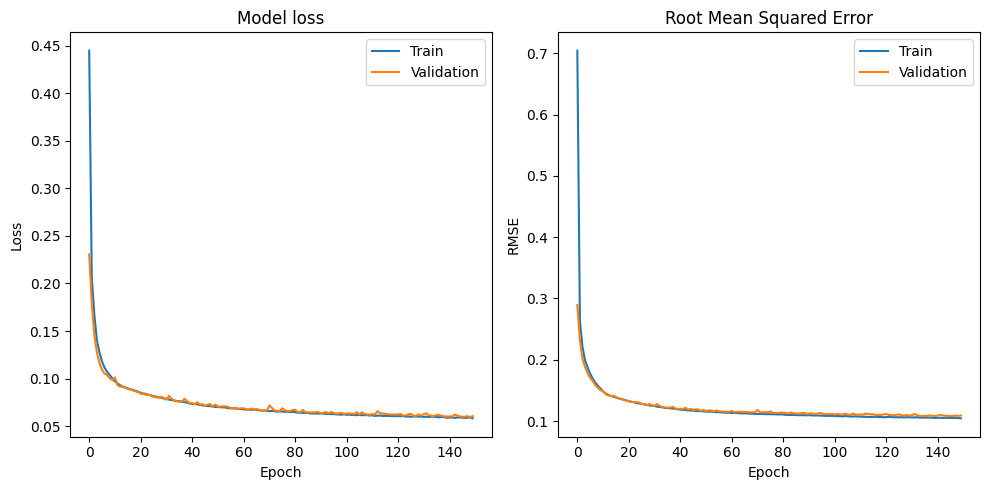

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Train')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation')
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

#EVALUATING

In [ ]:
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test_scaled, predictions)
accuracy_like_metric = 1 - (mae / (np.max(y_test_scaled) - np.min(y_test_scaled)))


print("Accuracy-like Metric:", accuracy_like_metric)

146/146 [==============================] - 0s 853us/step
Accuracy-like Metric: N_People    0.940542
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: 

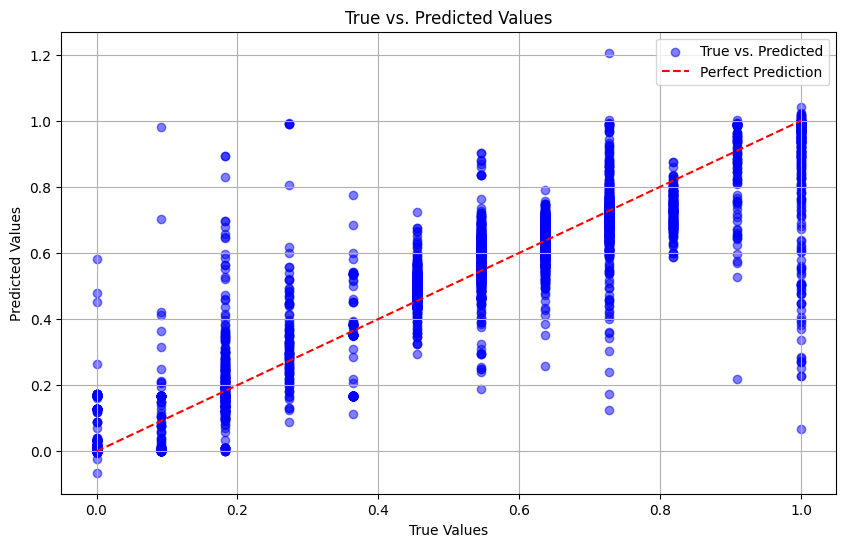

Accuracy-like Metric: N_People    0.940542
dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test_scaled, predictions, alpha=0.5, color='blue', label='True vs. Predicted')
plt.plot([np.min(y_test_scaled), np.max(y_test_scaled)], [np.min(y_test_scaled), np.max(y_test_scaled)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Display the accuracy-like metric
print("Accuracy-like Metric:", accuracy_like_metric)


In [ ]:
# Display the accuracy-like metric
print("Accuracy-like Metric:", accuracy_like_metric)

Accuracy-like Metric: N_People    0.940542
dtype: float64


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_scaled, predictions)
print(f'R-squared Score: {r2}')

R-squared Score: 0.8881847807871238


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
score = mean_absolute_error(y_test_scaled,predictions)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.06


In [ ]:
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

def accuracy(y_true, y_pred, threshold):
    correct_predictions = np.sum(np.abs(y_true - y_pred) <= threshold)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

threshold = 0.5

accuracy_train = accuracy(y_train_scaled, y_train_predicted, threshold)
accuracy_test = accuracy(y_test_scaled, y_test_predicted, threshold)

print('Accuracy:')
print('Train: {:.2%}'.format(float(accuracy_train)))
print('Test: {:.2%}'.format(float(accuracy_test)))




146/146 [==============================] - 0s 2ms/step
Accuracy:
Train: 99.20%
Test: 99.14%


In [ ]:
print('Accuracy ')
print('Train : ' ,accuracy_train)
print('-------->')
print('Test : ', accuracy_test)

Accuracy 
Train :  N_People    0.992027
dtype: float64
-------->
Test :  N_People    0.991402
dtype: float64
